In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('global-average-temperature-with-countries.csv')

In [3]:
data

,cartodb_id,the_geom,CountryName,Average_value,value_type,Unnamed: 5,Year
0,2,NaN,Aruba,-0.13,five_year_mean,NaN,1850
1,3,NaN,Afghanistan,-0.12,annual_mean,NaN,1851
2,4,NaN,Angola,-0.16,five_year_mean,NaN,1852
3,5,NaN,Albania,-0.10,annual_mean,NaN,1853
4,6,NaN,Andorra,-0.19,five_year_mean,NaN,1854
...,...,...,...,...,...,...,...
128,130,NaN,Lebanon,0.09,five_year_mean,NaN,1978
129,131,NaN,Liberia,0.12,annual_mean,NaN,1979
130,132,NaN,Libya,0.06,five_year_mean,NaN,1980
131,133,NaN,St. Lucia,-0.04,annual_mean,NaN,1981


<function matplotlib.pyplot.show(*args, **kw)>

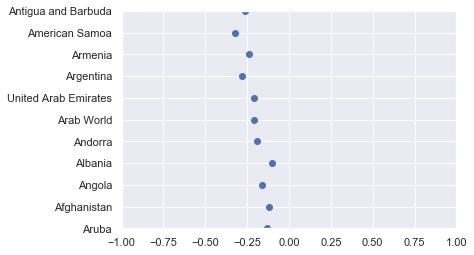

In [4]:
plt.scatter(data['Average_value'],data['CountryName'])
# Set limits of the axes, again to resemble the world map
plt.xlim(-1,1)
plt.ylim(0,10)
plt.show

In [5]:
x = data.iloc[:,[2,3]]

In [6]:
x

,CountryName,Average_value
0,Aruba,-0.13
1,Afghanistan,-0.12
2,Angola,-0.16
3,Albania,-0.10
4,Andorra,-0.19
...,...,...
128,Lebanon,0.09
129,Liberia,0.12
130,Libya,0.06
131,St. Lucia,-0.04


In [7]:
kmeans=KMeans()

In [8]:
kmeans.fit(x)

ValueError: could not convert string to float: 'Latin America & Caribbean'

In [1]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

NameError: name 'kmeans' is not defined

In [12]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,field_1,Country,Year,Category,Emissions,Cluster
0,1,Afghanistan,1990,Total.GHG.Emissions.Excluding.Land.Use.Change....,15.21,95
1,2,Afghanistan,1991,Total.GHG.Emissions.Excluding.Land.Use.Change....,15.29,95
2,3,Afghanistan,1992,Total.GHG.Emissions.Excluding.Land.Use.Change....,14.01,95
3,4,Afghanistan,1993,Total.GHG.Emissions.Excluding.Land.Use.Change....,14.03,95
4,5,Afghanistan,1994,Total.GHG.Emissions.Excluding.Land.Use.Change....,13.99,95
...,...,...,...,...,...,...
82857,90236,Zimbabwe,2009,Fugitive.Emissions..MtCO2e.,0.22,84
82858,90237,Zimbabwe,2010,Fugitive.Emissions..MtCO2e.,0.22,84
82859,90238,Zimbabwe,2011,Fugitive.Emissions..MtCO2e.,0.22,84
82860,90239,Zimbabwe,2012,Fugitive.Emissions..MtCO2e.,0.23,84


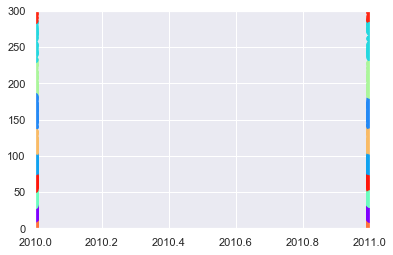

In [19]:
plt.scatter(data_with_clusters['Year'],data_with_clusters['Emissions'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(2010,2011)
plt.ylim(0,300)
plt.show()